<a class="anchor" id="0"></a>
# **Table of Contents**

1. [Import Libraty](#1)
2. [Import dataset](#2)
3. [Exploratory-data-analysis](#3)
4. [Data cleaning and preparation](#4)
5. [Feature Engineering](#5)

# **1. Import Libary**<a class="anchor" id="1"></a>

>[Table of Contents](#0)

In [198]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

! pip install category_encoders
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


In [199]:
import warnings

warnings.filterwarnings('ignore')

# **2. Import dataset**<a class="anchor" id="2"></a>

>[Table of Contents](#0)

In [200]:
data = "./dataSheet\weatherAUS.csv"

df = pd.read_csv(data)

# **3. Exploratory data analysis**<a class="anchor" id="3"></a>


>[Table of Contents](#0)

Explore the data to gain insights about the data.

In [201]:
# view dimensions of dataset

df.shape

(145460, 23)

There are 142193 instances and 24 variables in the data set.

In [202]:
# preview the dataset

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [203]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Drop  RISK_MM column

It is given in the dataset description, that the `RISK_MM` column should drop.

In [204]:
if 'RISK_MM' in df.columns:
    df.drop(['RISK_MM'], axis=1, inplace=True)
else:
    print("'RISK_MM' does not exist in the DataFrame")

'RISK_MM' does not exist in the DataFrame


In [205]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Types of variables


In this section, the dataset segregate into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

#### categorical variables

In [206]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [207]:
# view the categorical variables

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


Summary of categorical variables


- There is a date variable. It is denoted by `Date` column.


- There are 6 categorical variables. These are given by `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` and  `RainTomorrow`.


- There are two binary categorical variables - `RainToday` and  `RainTomorrow`.


- `RainTomorrow` is the target variable.

#### numerical variables

In [208]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 16 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [209]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


Summary of numerical variables


- There are 16 numerical variables.


- These are given by `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am` and `Temp3pm`.


- All of the numerical variables are of continuous type.

## Show NaN values

In [210]:
# show NaN values in the all columns, the percentage of NaN values in each column, and the total number of rows
nan_values = df.isnull().sum()
nan_percentage = (nan_values / len(df)) * 100

nan_values_percentage = pd.concat(
    [nan_values, nan_percentage], axis=1, keys=["NaN Values", "Percentage"]
)

total_rows = len(df)

print("Total Rows:", total_rows)
print(nan_values_percentage)

Total Rows: 145460
               NaN Values  Percentage
Date                    0    0.000000
Location                0    0.000000
MinTemp              1485    1.020899
MaxTemp              1261    0.866905
Rainfall             3261    2.241853
Evaporation         62790   43.166506
Sunshine            69835   48.009762
WindGustDir         10326    7.098859
WindGustSpeed       10263    7.055548
WindDir9am          10566    7.263853
WindDir3pm           4228    2.906641
WindSpeed9am         1767    1.214767
WindSpeed3pm         3062    2.105046
Humidity9am          2654    1.824557
Humidity3pm          4507    3.098446
Pressure9am         15065   10.356799
Pressure3pm         15028   10.331363
Cloud9am            55888   38.421559
Cloud3pm            59358   40.807095
Temp9am              1767    1.214767
Temp3pm              3609    2.481094
RainToday            3261    2.241853
RainTomorrow         3267    2.245978


## Show distribution graph

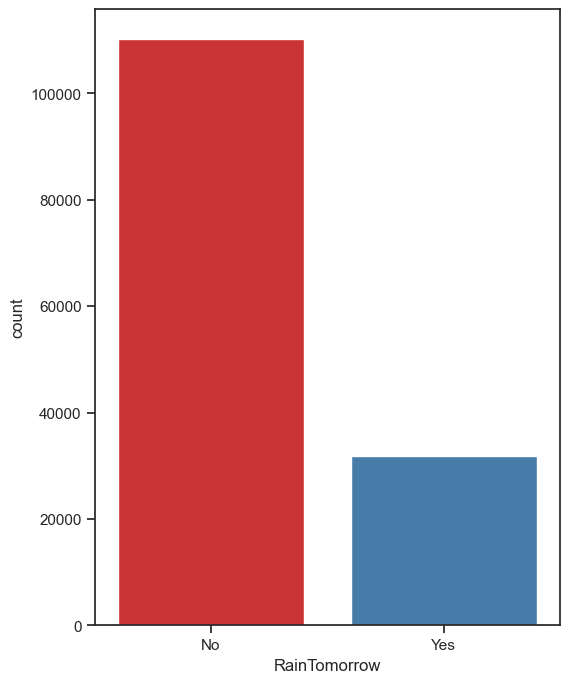

In [211]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

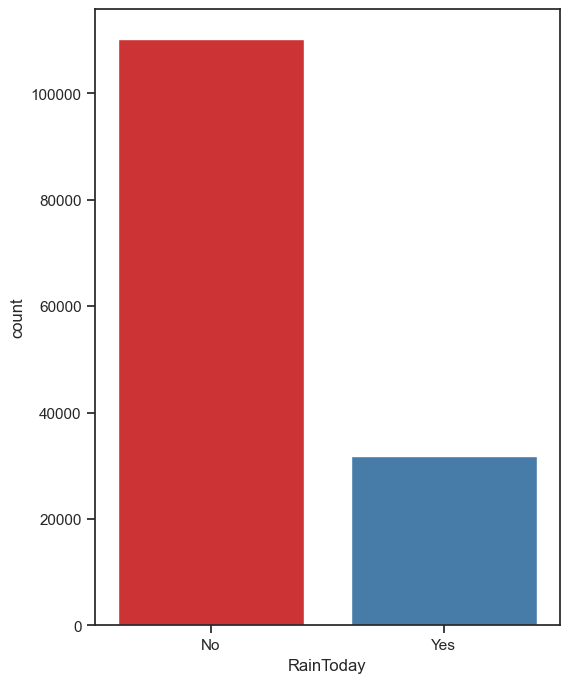

In [212]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainToday", data=df, palette="Set1")
plt.show()

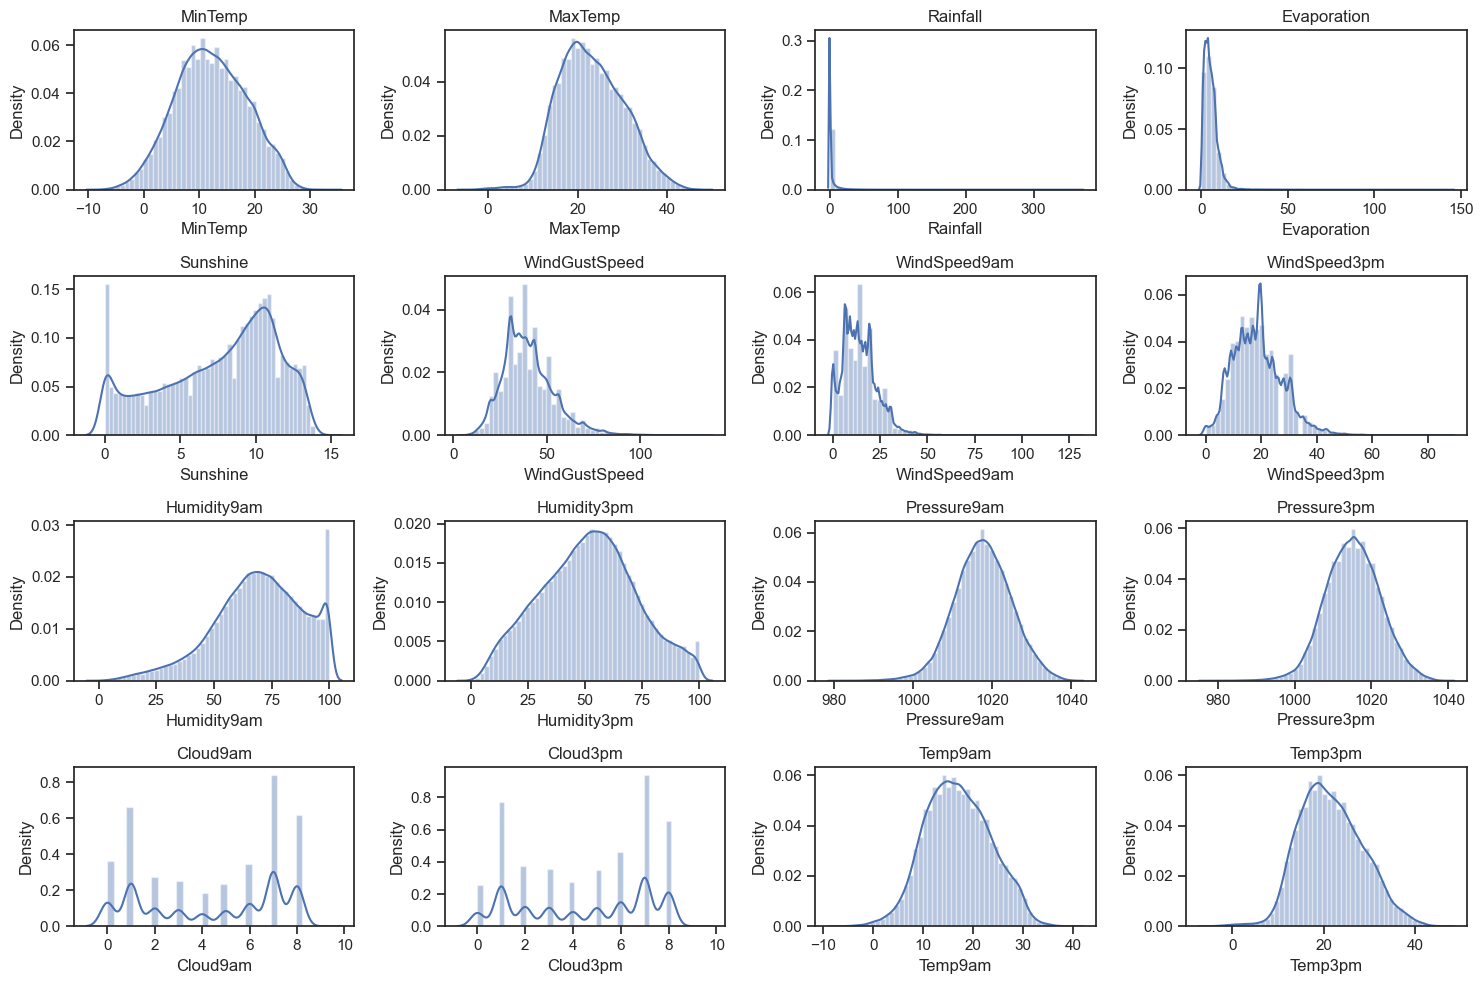

In [213]:
import seaborn as sns

# Set the style of the plots
sns.set(style="ticks")

# Create subplots for each column
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))

# Flatten the axes array
axes = axes.flatten()

# Loop through each column and create a distribution plot
for i, column in enumerate(df[numerical].columns):
    sns.distplot(df[column], ax=axes[i])
    axes[i].set_title(column)

# Remove empty subplots
if len(df[numerical].columns) < len(axes):
    for j in range(len(df[numerical].columns), len(axes)):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [214]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df, title="Profiling Report")
# profile

## Correlation and Causation

### Correlation

Correlation refers to the statistical relationship between two variables. It measures the strength and direction of the linear relationship between two variables. The correlation coefficient ranges from -1 to 1. A value closer to 1 implies a strong positive correlation (as one variable increases, the other also increases), a value closer to -1 implies a strong negative correlation (as one variable increases, the other decreases), and a value close to 0 implies no correlation.

For example, in our dataset, we might expect to see a positive correlation between `MinTemp` and `MaxTemp` - as the minimum temperature for the day increases, we would generally expect the maximum temperature to also increase.

### Causation

Causation, on the other hand, goes a step beyond correlation. It refers to a cause and effect relationship where a change in one variable leads to a change in another. In other words, causation provides a means of saying that an action causes an outcome.

For instance, in our dataset, an increase in `Rainfall` might cause an increase in `Humidity9am` and `Humidity3pm` because rain adds moisture to the air, which could increase humidity levels. However, proving causation is generally more complex and requires more rigorous study design and analysis than proving learning models.


## Explore problems within categorical variables

### Missing values in categorical variables

In [215]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [216]:
# Categorical variables with missing values
cat_with_missing = [var for var in categorical if df[var].isnull().sum() != 0]
print("Categorical variables with missing values:")
print(df[cat_with_missing].isnull().sum())

# Categorical variables without missing values
cat_without_missing = [var for var in categorical if df[var].isnull().sum() == 0]
print("\nCategorical variables without missing values:")
print(cat_without_missing)

Categorical variables with missing values:
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

Categorical variables without missing values:
['Date', 'Location']


In the dataset, there are four categorical variables that contain missing values: `WindGustDir`, `WindDir9am`, `WindDir3pm`, and `RainToday`. Additionally, the variables `Date`, `Location`, and `RainTomorrow` do not contain any missing values.

### Frequency counts of categorical variables


Check the frequency counts of categorical variables.

In [217]:
# view frequency of categorical variables

for var in categorical:

    print(df[var].value_counts())

Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAA

In [218]:
# view frequency distribution of categorical variables

for var in categorical:

    print(df[var].value_counts()/float(len(df)))

Date
2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: count, Length: 3436, dtype: float64
Location
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Woomera             0.02

WindDir3pm
SE     0.074508
W      0.069504
S      0.068239
WSW    0.065434
SSE    0.064616
SW     0.064306
N      0.061116
WNW    0.061006
NW     0.059192
ESE    0.058470
E      0.058243
NE     0.056806
SSW    0.056070
NNW    0.054104
ENE    0.054015
NNE    0.045305
Name: count, dtype: float64
RainToday
No     0.758415
Yes    0.219167
Name: count, dtype: float64
RainTomorrow
No     0.758394
Yes    0.219146
Name: count, dtype: float64


### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [219]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


The `Date` variable need to be preprocessed. The preprocessing will do  in the following section.


All the other variables contain relatively smaller number of variables.

### Preparation of Date Variable

In [220]:
df["Date"].dtypes

dtype('O')

The data type of `Date` variable is object. The date, which is currently coded as an object, will be parsed into datetime format.

In [221]:
# parse the dates, currently coded as strings, into datetime format

df["Date"] = pd.to_datetime(df["Date"])

# extract year from date

df["Year"] = df["Date"].dt.year

print(df["Year"].head())

# extract month from date

df["Month"] = df["Date"].dt.month

print(df["Month"].head())

# extract day from date

df["Day"] = df["Date"].dt.day

print(df["Day"].head())

# again view the summary of dataset

print(df.info())

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int32
0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int32
0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpee

There are three additional columns created from `Date` variable. Now,the original `Date` variable can drop from the dataset.

In [222]:
# drop the original Date variable

if 'Date' in df.columns:
    df.drop('Date', axis=1, inplace=True)
else:
    print("'Date' does not exist in the DataFrame")

Now, the `Date` variable has been removed from the dataset.


In [223]:
# Drop year month and day columns 
# beacuse it's not a physical measurement
# the preparation above is just for showing how to extract year, month, and day from the date column and for note

if 'Year' in df.columns:
    df.drop('Year', axis=1, inplace=True)
else:
    print("'Year' does not exist in the DataFrame")

if 'Month' in df.columns:
    df.drop('Month', axis=1, inplace=True)
else:
    print("'Month' does not exist in the DataFrame")

if 'Day' in df.columns:
    df.drop('Day', axis=1, inplace=True)
else:
    print("'Day' does not exist in the DataFrame")

### Preaparation of Categorical Variables


Prepare the categorical variables one by one.

In [224]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype == "O"]

print("There are {} categorical variables\n".format(len(categorical)))

print("The categorical variables are :", categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


There are 6 categorical variables in the dataset. The `Date` variable has been removed. First,check missing values in categorical variables.

In [225]:
# check for missing values in categorical variables

df[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

The `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` variables contain missing values. These variables will explored one by one.

### Explore `Location` variable

In [226]:
# print number of labels in Location variable

if 'Location' in df.columns:
    print("Location contains", len(df.Location.unique()), "labels")

# check labels in location variable
if 'Location' in df.columns:
    print("Location contains the following labels: ")
    print(df.Location.unique())

# check frequency distribution of values in Location variable
if 'Location' in df.columns:
    print("Frequency distribution of values in Location variable: ")
    print(df.Location.value_counts())

# drop the variable Location because it has high cardinality
# and Location is not physical measurement
# the preparation above is just for showing how to check the cardinality of the categorical variables and for note

if 'Location' in df.columns:
    df.drop('Location', axis=1, inplace=True)
else:
    print("'Location' does not exist in the DataFrame")

# remove location on categorical
for var in categorical:
    if var == "Location":
        categorical.remove(var)

Location contains 49 labels
Location contains the following labels: 
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Frequency distribution of values in Location variable: 
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville

In [227]:
# show the current dataframe

print(df.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0     13.4     22.9       0.6          NaN       NaN           W   
1      7.4     25.1       0.0          NaN       NaN         WNW   
2     12.9     25.7       0.0          NaN       NaN         WSW   
3      9.2     28.0       0.0          NaN       NaN          NE   
4     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0           44.0          W        WNW          20.0  ...         71.0   
1           44.0        NNW        WSW           4.0  ...         44.0   
2           46.0          W        WSW          19.0  ...         38.0   
3           24.0         SE          E          11.0  ...         45.0   
4           41.0        ENE         NW           7.0  ...         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1       8.0       NaN     16.9   


### Explore `WindGustDir` variable

In [228]:
# print number of labels in WindGustDir variable

print("WindGustDir contains", len(df["WindGustDir"].unique()), "labels")

# check labels in WindGustDir variable

print(df["WindGustDir"].unique())

# check frequency distribution of values in WindGustDir variable

print(df.WindGustDir.value_counts())

# One Hot Encoding will be performed on the 'WindGustDir' variable,
# resulting in k-1 dummy variables after One Hot Encoding.
# Additionally, an extra dummy variable will be added to indicate the presence of missing data.
# The dataset can then be previewed using the head() method.


print(pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head())

# The number of 1's per boolean variable is summed over the rows of the dataset.
# This will indicate the number of observations present for each category.

print(pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0))

# check for missing values in WindGustDir variable
print("Missing values in WindGustDir variable: ")
print(df["WindGustDir"].isnull().sum())

WindGustDir contains 17 labels
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64
     ENE    ESE      N     NE    NNE    NNW     NW      S     SE    SSE  \
0  False  False  False  False  False  False  False  False  False  False   
1  False  False  False  False  False  False  False  False  False  False   
2  False  False  False  False  False  False  False  False  False  False   
3  False  False  False   True  False  False  False  False  False  False   
4  False  False  False  False  False  False  False  False  False  False   

     SSW     SW      W    WNW    WSW    NaN  
0  False  False   True  False  False  False  
1  False  False  False   True  False  False  
2  False  False  False  False   True  False  
3  False  Fal

### Explore `WindDir9am` variable

In [229]:
# print number of labels in WindDir9am variable

print("WindDir9am contains", len(df["WindDir9am"].unique()), "labels")

# check labels in WindDir9am variable

print(df["WindDir9am"].unique())

# check frequency distribution of values in WindDir9am variable

print(df["WindDir9am"].value_counts())

# One Hot Encoding will be performed on the 'WindDir9am' variable,
# resulting in k-1 dummy variables after One Hot Encoding.
# Additionally, an extra dummy variable will be added to indicate the presence of missing data.
# The dataset can then be previewed using the head() method.

print(pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head())

# The number of 1's per boolean variable is summed over the rows of the dataset.
# This will indicate the number of observations present for each category.

print(pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0))

# check for missing values in WindDir9am variable
print("Missing values in WindDir9am variable: ")
print(df["WindDir9am"].isnull().sum())

WindDir9am contains 17 labels
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64
     ENE    ESE      N     NE    NNE    NNW     NW      S     SE    SSE  \
0  False  False  False  False  False  False  False  False  False  False   
1  False  False  False  False  False   True  False  False  False  False   
2  False  False  False  False  False  False  False  False  False  False   
3  False  False  False  False  False  False  False  False   True  False   
4   True  False  False  False  False  False  False  False  False  False   

     SSW     SW      W    WNW    WSW    NaN  
0  False  False   True  False  False  False  
1  False  False  False  False  False  False  
2  False  False   True  False  False  False  

### Explore `WindDir3pm` variable

In [230]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

# check labels in WindDir3pm variable

print(df["WindDir3pm"].unique())

# check frequency distribution of values in WindDir3pm variable

print(df["WindDir3pm"].value_counts())

# One Hot Encoding will be performed on the 'WindDir3pm' variable,
# resulting in k-1 dummy variables after One Hot Encoding.
# Additionally, an extra dummy variable will be added to indicate the presence of missing data.
# The dataset can then be previewed using the head() method.

print(pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head())

# The number of 1's per boolean variable is summed over the rows of the dataset.
# This will indicate the number of observations present for each category.

print(pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0))

# check for missing values in WindDir3pm variable
print("Missing values in WindDir3pm variable: ")
print(df["WindDir3pm"].isnull().sum())

WindDir3pm contains 17 labels
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: count, dtype: int64
     ENE    ESE      N     NE    NNE    NNW     NW      S     SE    SSE  \
0  False  False  False  False  False  False  False  False  False  False   
1  False  False  False  False  False  False  False  False  False  False   
2  False  False  False  False  False  False  False  False  False  False   
3  False  False  False  False  False  False  False  False  False  False   
4  False  False  False  False  False  False   True  False  False  False   

     SSW     SW      W    WNW    WSW    NaN  
0  False  False  False   True  False  False  
1  False  False  False  False   True  False  
2  False  False  False  False   True  False  

### Explore `RainToday` variable

In [231]:
# print number of labels in RainToday variable

print("RainToday contains", len(df["RainToday"].unique()), "labels")

# check labels in RainToday variable

print(df["RainToday"].unique())

# check frequency distribution of values in RainToday variable

print(df.RainToday.value_counts())

# One Hot Encoding will be performed on the 'RainToday' variable,
# resulting in k-1 dummy variables after One Hot Encoding.
# Additionally, an extra dummy variable will be added to indicate the presence of missing data.
# The dataset can then be previewed using the head() method.

print(pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head())

# The number of 1's per boolean variable is summed over the rows of the dataset.
# This will indicate the number of observations present for each category.

print(pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0))

# check for missing values in RainToday variable
print("Missing values in RainToday variable: ")
print(df["RainToday"].isnull().sum())

RainToday contains 3 labels
['No' 'Yes' nan]
RainToday
No     110319
Yes     31880
Name: count, dtype: int64
     Yes    NaN
0  False  False
1  False  False
2  False  False
3  False  False
4  False  False
Yes    31880
NaN     3261
dtype: int64
Missing values in RainToday variable: 
3261


In [232]:
# show the current dataframe
print(df.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0     13.4     22.9       0.6          NaN       NaN           W   
1      7.4     25.1       0.0          NaN       NaN         WNW   
2     12.9     25.7       0.0          NaN       NaN         WSW   
3      9.2     28.0       0.0          NaN       NaN          NE   
4     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0           44.0          W        WNW          20.0  ...         71.0   
1           44.0        NNW        WSW           4.0  ...         44.0   
2           46.0          W        WSW          19.0  ...         38.0   
3           24.0         SE          E          11.0  ...         45.0   
4           41.0        ENE         NW           7.0  ...         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1       8.0       NaN     16.9   


### Explore Numerical Variables

In [233]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype != "O"]

print("There are {} numerical variables\n".format(len(numerical)))

print("The numerical variables are :", numerical)

# view the numerical variables

print(df[numerical].head())

There are 16 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3   

### Summary of numerical variables


- There are 16 numerical variables.


- These are given by `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am` and `Temp3pm`.


- All of the numerical variables are of continuous type.

## Explore problems within numerical variables

### Missing values in numerical variables

In [234]:
# check missing values in numerical variables

print(df[numerical].isnull().sum())

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64


### Outliers in numerical variables

In [235]:
# view summary statistics in numerical variables
# to check for outliers

print(round(df[numerical].describe()), 2)

print("Show the boxplot of numerical variables")

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

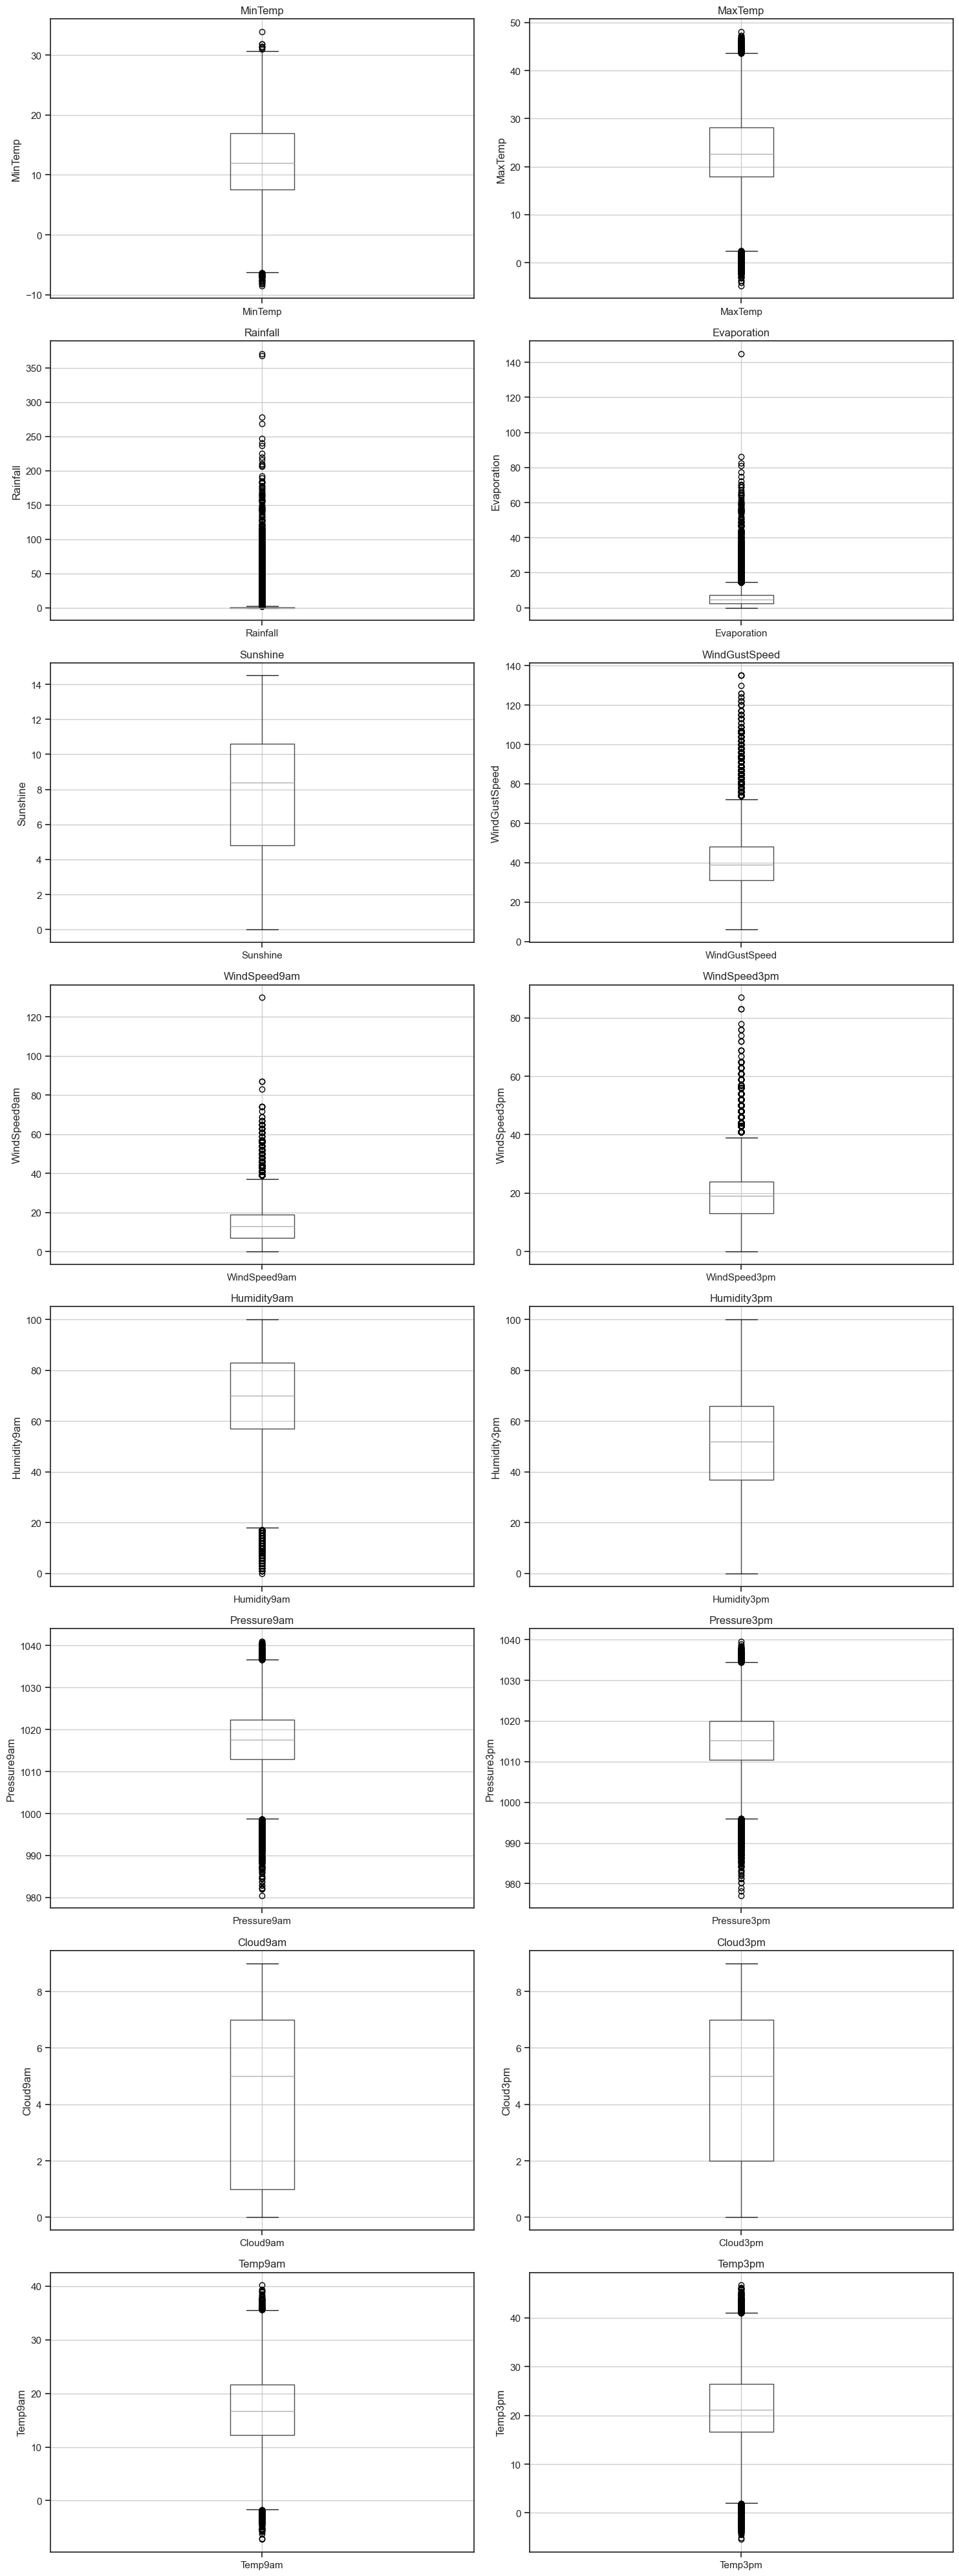

Show the histogram of numerical variables


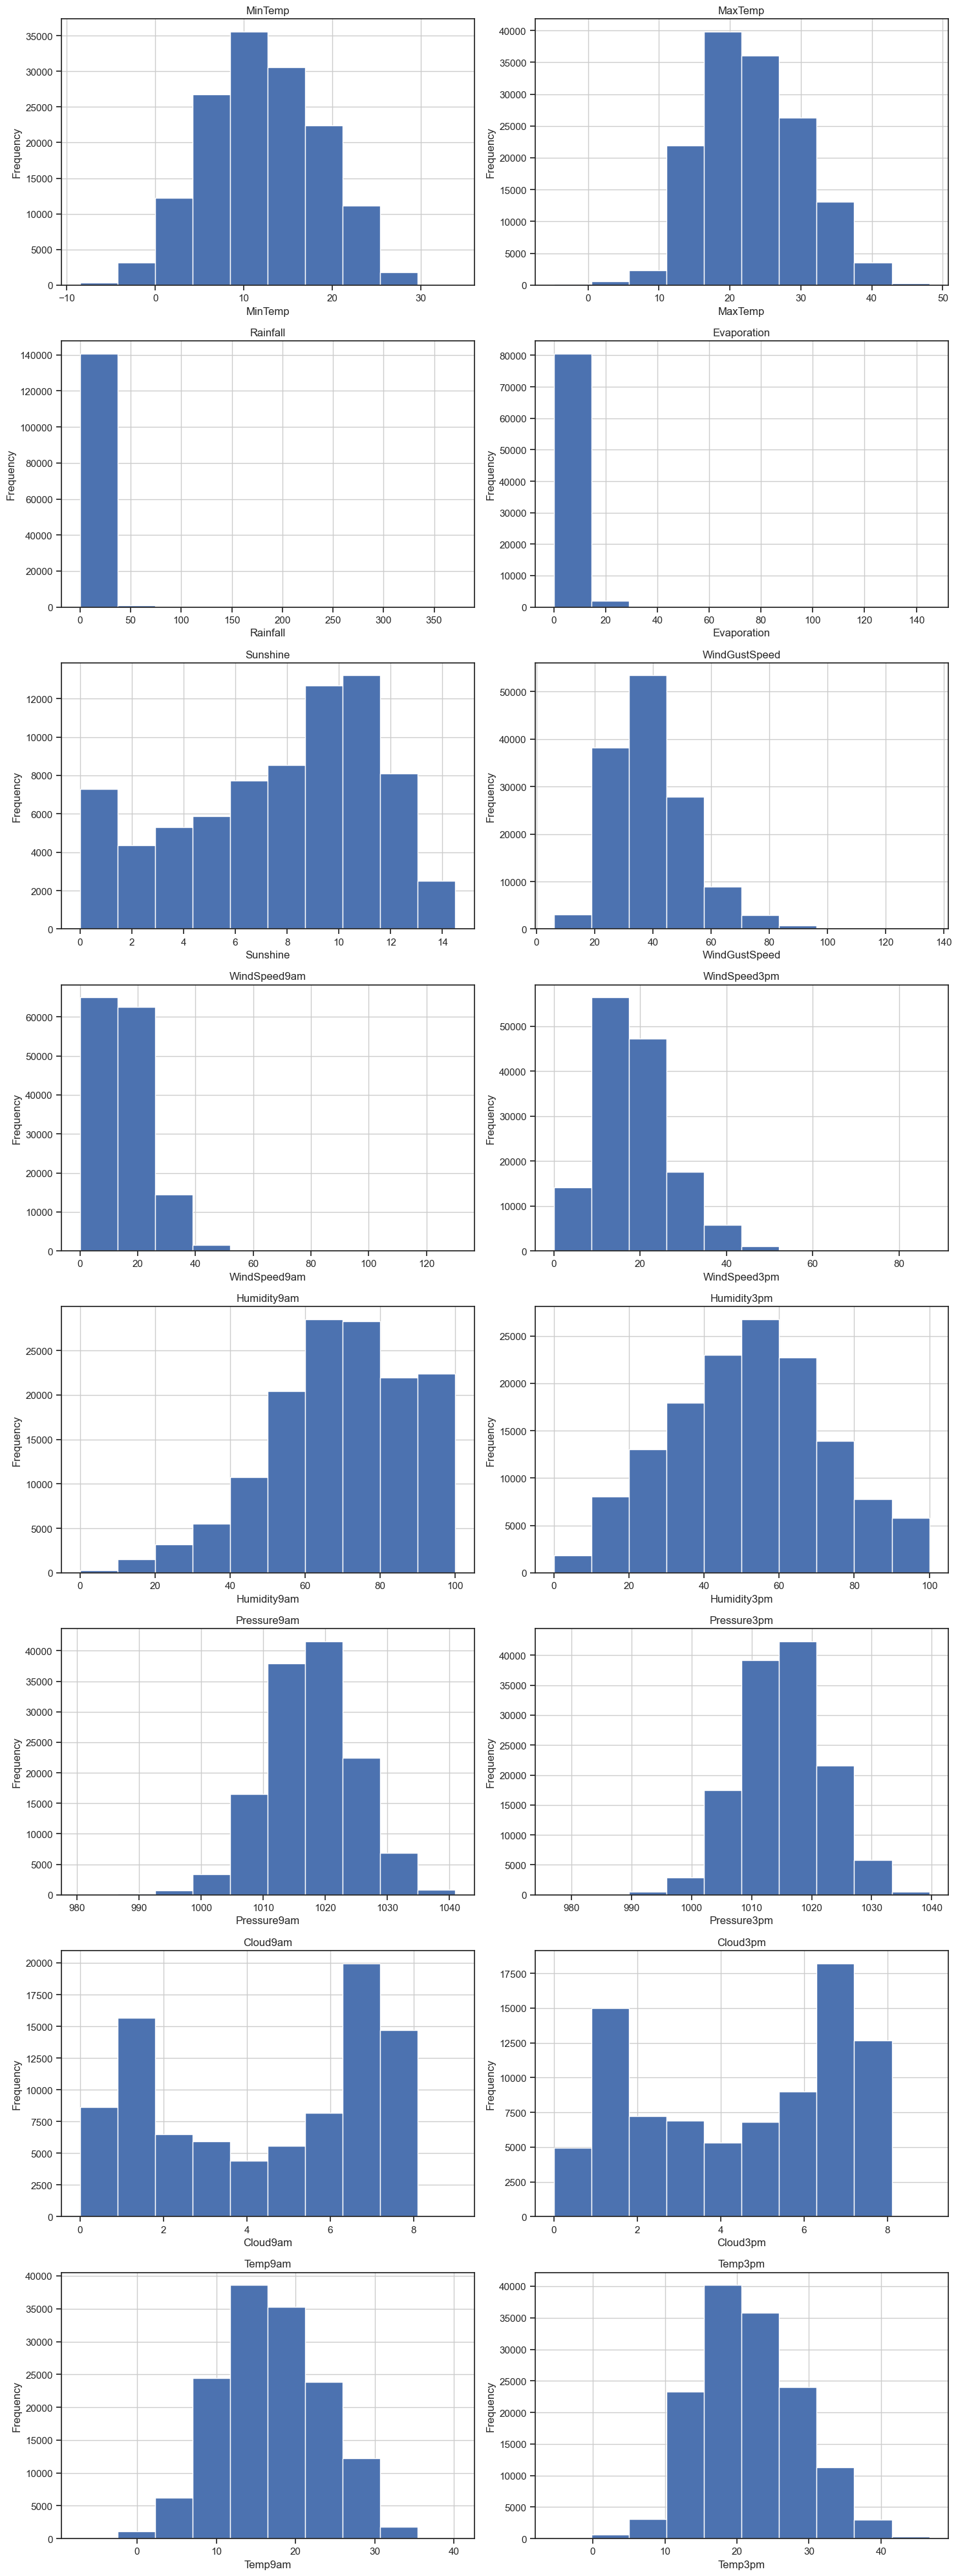

In [236]:
import matplotlib.pyplot as plt

# Calculate the number of rows needed for subplots
num_plots = len(numerical)
num_columns = 2
num_rows = num_plots // num_columns + (num_plots % num_columns > 0)

plt.figure(figsize=(15, 5 * num_rows))

for index, var in enumerate(numerical):
    plt.subplot(num_rows, num_columns, index + 1)
    fig = df.boxplot(column=var)
    fig.set_title(var)
    fig.set_ylabel(var)

plt.tight_layout()
plt.show()

print("Show the histogram of numerical variables")

# Plot histograms for numerical variables
plt.figure(figsize=(15, 5 * num_rows))

for index, var in enumerate(numerical):
    plt.subplot(num_rows, num_columns, index + 1)
    df[var].hist()
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [237]:
# check using Interquartile Range (IQR) method

# find the IQR for each numerical variable
# the IQR is the range between the 25th and 75th quantiles
# the IQR multiplied by 3 to detect extreme outliers.
# while 1.5 is for mild outliers
IQR = df[numerical].quantile(0.75) - df[numerical].quantile(0.25)
Lower_fence = df[numerical].quantile(0.25) - (IQR * 3)
Upper_fence = df[numerical].quantile(0.75) + (IQR * 3)

outliers = pd.DataFrame(columns=df[numerical].columns)
has_outliers = []

# check for outliers
for i, j in enumerate(numerical):
    print(
        "{out} outilers are values  < {lowerboundary} or > {upperboundary}".format(
            out=j, lowerboundary=Lower_fence[j], upperboundary=Upper_fence[j]
        )
    )
    print('Minimum value of', j, 'is', df[j].min(), 'the difference is', df[j].min() - Lower_fence[j])
    print('Maximum value of', j, 'is', df[j].max(), 'the difference is', df[j].max() - Upper_fence[j])

    # check if this field has outliers
    if (df[j].min() < Lower_fence[j] -10) or (df[j].max() > Upper_fence[j] + 10):
        print(j, "has outliers")
        has_outliers.append(j)


# print the outliers
print('=========================')
if len(has_outliers) > 0:
    print("The following fields have outliers: ", has_outliers)

MinTemp outilers are values  < -20.299999999999997 or > 44.8
Minimum value of MinTemp is -8.5 the difference is 11.799999999999997
Maximum value of MinTemp is 33.9 the difference is -10.899999999999999
MaxTemp outilers are values  < -13.000000000000004 or > 59.1
Minimum value of MaxTemp is -4.8 the difference is 8.200000000000003
Maximum value of MaxTemp is 48.1 the difference is -11.0
Rainfall outilers are values  < -2.4000000000000004 or > 3.2
Minimum value of Rainfall is 0.0 the difference is 2.4000000000000004
Maximum value of Rainfall is 371.0 the difference is 367.8
Rainfall has outliers
Evaporation outilers are values  < -11.800000000000002 or > 21.800000000000004
Minimum value of Evaporation is 0.0 the difference is 11.800000000000002
Maximum value of Evaporation is 145.0 the difference is 123.19999999999999
Evaporation has outliers
Sunshine outilers are values  < -12.599999999999998 or > 28.0
Minimum value of Sunshine is 0.0 the difference is 12.599999999999998
Maximum value o

In [238]:
# show the current dataframe
print(df.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0     13.4     22.9       0.6          NaN       NaN           W   
1      7.4     25.1       0.0          NaN       NaN         WNW   
2     12.9     25.7       0.0          NaN       NaN         WSW   
3      9.2     28.0       0.0          NaN       NaN          NE   
4     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0           44.0          W        WNW          20.0  ...         71.0   
1           44.0        NNW        WSW           4.0  ...         44.0   
2           46.0          W        WSW          19.0  ...         38.0   
3           24.0         SE          E          11.0  ...         45.0   
4           41.0        ENE         NW           7.0  ...         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1       8.0       NaN     16.9   


# **4. Data Cleaning and Preparation**<a class="anchor" id="4"></a>


>[Table of Contents](#0)

Clean the data and prepare it for the machine learning model.

In [239]:
# check data types in

print(df.dtypes)

# display categorical variables

categorical = [col for col in df.columns if df[col].dtypes == "O"]

print("List of Categorical Variables: ", categorical)

# display numerical variables

numerical = [col for col in df.columns if df[col].dtypes != 'O']

print("List of Numerical Variables: ", numerical)

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object
List of Categorical Variables:  ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
List of Numerical Variables:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


## Handle NaN values in numerival variables

In [240]:
# check missing values in numerical variables in dataframe

print(df[numerical].isnull().sum())

# print percentage of missing values in the numerical variables in dataframe
print("Percentage of missing values in the numerical variables in dataframe")
for col in numerical:
    if df[col].isnull().mean() > 0:
        print(col, round(df[col].isnull().mean(), 4))

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64
Percentage of missing values in the numerical variables in dataframe
MinTemp 0.0102
MaxTemp 0.0087
Rainfall 0.0224
Evaporation 0.4317
Sunshine 0.4801
WindGustSpeed 0.0706
WindSpeed9am 0.0121
WindSpeed3pm 0.0211
Humidity9am 0.0182
Humidity3pm 0.031
Pressure9am 0.1036
Pressure3pm 0.1033
Cloud9am 0.3842
Cloud3pm 0.4081
Temp9am 0.0121
Temp3pm 0.0248


**Assumption**


It is assumed that the data are missing completely at random (MCAR). Two methods can be utilized to impute missing values: mean or median imputation, and random sample imputation. Median imputation is preferred when outliers are present in the dataset, as it is robust to outliers.



Missing values will be imputed using the appropriate statistical measures of the data, in this case, the median. Imputation should be conducted on the dataframe.

In [241]:
# impute missing values in dataframe with median


for col in numerical:
    col_median = df[col].median()
    df[col].fillna(col_median, inplace=True)

In [242]:
# check again missing values in numerical variables in dataframe

print(df[numerical].isnull().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64


## Handle NaN values in categorical variables

In [243]:
# pcheck missing values in categorical variables in dataframe

df[categorical].isnull().sum()

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [244]:
# impute missing categorical variables with most frequent value

for col in categorical:
    most_frequent = df[col].mode()[0]
    df[col].fillna(most_frequent, inplace=True)

In [245]:
# check again missing values in categorical variables in dataframe

print(df[categorical].isnull().sum())

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64


In [246]:
# check all

print(df.isnull().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


## Handle outliers in numerical variables

In [247]:
# print outliers

print('outlier list: ',has_outliers)

outlier list:  ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']


In [248]:
# calculate he upper boundary for each outliers variables

for i in has_outliers:
    IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
    Upper_fence = df[i].quantile(0.75) + (IQR * 3)
    print('Upper boundary for', i, 'is', Upper_fence)

Upper boundary for Rainfall is 2.4
Upper boundary for Evaporation is 8.8
Upper boundary for WindGustSpeed is 91.0
Upper boundary for WindSpeed9am is 55.0
Upper boundary for WindSpeed3pm is 57.0


In [249]:
# fill te outliers with upper boundary

for i in has_outliers:
    IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
    Upper_fence = df[i].quantile(0.75) + (IQR * 3)
    df[i] = np.where(df[i] > Upper_fence, Upper_fence, df[i])

In [250]:
# check the outliers

for i in has_outliers:
    print('Maximum value of', i, 'is', df[i].max())

Maximum value of Rainfall is 2.4
Maximum value of Evaporation is 8.8
Maximum value of WindGustSpeed is 91.0
Maximum value of WindSpeed9am is 55.0
Maximum value of WindSpeed3pm is 57.0


## Encode categorical variables

In [251]:
print(categorical)

print(df[categorical].head())

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
  WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0           W          W        WNW        No           No
1         WNW        NNW        WSW        No           No
2         WSW          W        WSW        No           No
3          NE         SE          E        No           No
4           W        ENE         NW        No           No


In [252]:
# encode RainToday and RainTomorrow to 1 and 0

df["RainToday"].replace({"No": 0, "Yes": 1}, inplace=True)
df["RainTomorrow"].replace({"No": 0, "Yes": 1}, inplace=True)
df['RainToday'] = df['RainToday'].astype('int32')
df['RainTomorrow'] = df['RainTomorrow'].astype('int32')

print(df[categorical].head())

  WindGustDir WindDir9am WindDir3pm  RainToday  RainTomorrow
0           W          W        WNW          0             0
1         WNW        NNW        WSW          0             0
2         WSW          W        WSW          0             0
3          NE         SE          E          0             0
4           W        ENE         NW          0             0


In [253]:
# do one hot encoding for the rest of the categorical variables

for col in categorical:
    if col != 'RainToday' and col != 'RainTomorrow':
        df = pd.concat([df, pd.get_dummies(df[col], drop_first=True, prefix=col)], axis=1)
        df.drop(col, axis=1, inplace=True)

In [254]:
print(df.head())
print(df.columns)

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          4.8       8.4           44.0   
1      7.4     25.1       0.0          4.8       8.4           44.0   
2     12.9     25.7       0.0          4.8       8.4           46.0   
3      9.2     28.0       0.0          4.8       8.4           24.0   
4     17.5     32.3       1.0          4.8       8.4           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_NNW  \
0          20.0          24.0         71.0         22.0  ...           False   
1           4.0          22.0         44.0         25.0  ...           False   
2          19.0          26.0         38.0         30.0  ...           False   
3          11.0           9.0         45.0         16.0  ...           False   
4           7.0          20.0         82.0         33.0  ...           False   

   WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
0          

In [255]:
# change boolean to 1 and 0

for column in df.columns:
    if df[column].dtype == bool:
        print(column)
        df[column] = df[column].astype(int)

WindGustDir_ENE
WindGustDir_ESE
WindGustDir_N
WindGustDir_NE
WindGustDir_NNE
WindGustDir_NNW
WindGustDir_NW
WindGustDir_S
WindGustDir_SE
WindGustDir_SSE
WindGustDir_SSW
WindGustDir_SW
WindGustDir_W
WindGustDir_WNW
WindGustDir_WSW
WindDir9am_ENE
WindDir9am_ESE
WindDir9am_N
WindDir9am_NE
WindDir9am_NNE
WindDir9am_NNW
WindDir9am_NW
WindDir9am_S
WindDir9am_SE
WindDir9am_SSE
WindDir9am_SSW
WindDir9am_SW
WindDir9am_W
WindDir9am_WNW
WindDir9am_WSW
WindDir3pm_ENE
WindDir3pm_ESE
WindDir3pm_N
WindDir3pm_NE
WindDir3pm_NNE
WindDir3pm_NNW
WindDir3pm_NW
WindDir3pm_S
WindDir3pm_SE
WindDir3pm_SSE
WindDir3pm_SSW
WindDir3pm_SW
WindDir3pm_W
WindDir3pm_WNW
WindDir3pm_WSW


In [256]:
print(df.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          4.8       8.4           44.0   
1      7.4     25.1       0.0          4.8       8.4           44.0   
2     12.9     25.7       0.0          4.8       8.4           46.0   
3      9.2     28.0       0.0          4.8       8.4           24.0   
4     17.5     32.3       1.0          4.8       8.4           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_NNW  \
0          20.0          24.0         71.0         22.0  ...               0   
1           4.0          22.0         44.0         25.0  ...               0   
2          19.0          26.0         38.0         30.0  ...               0   
3          11.0           9.0         45.0         16.0  ...               0   
4           7.0          20.0         82.0         33.0  ...               0   

   WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
0          

## Scaling Numerical

In [257]:
print(df.describe())
print(df.columns)

             MinTemp        MaxTemp       Rainfall    Evaporation  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean       12.192053      23.215962       0.545260       4.865667   
std         6.365780       7.088358       0.923232       2.003972   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.700000      18.000000       0.000000       4.000000   
50%        12.000000      22.600000       0.000000       4.800000   
75%        16.800000      28.200000       0.600000       5.200000   
max        33.900000      48.100000       2.400000       8.800000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean        7.989889      39.938395      14.026200      18.665853   
std         2.757790      13.013994       8.835618       8.696889   
min         0.000000       6.000000       0.000000       0.000000   
25%         8.200000      31.0000

In [258]:
# scaling the numerical variables

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# print("Before do scaling")
# print(df[numerical])
# print(df[numerical].describe())
# df[numerical] = scaler.fit_transform(df[numerical])

# print("After do scaling ==========")
# print(df[numerical])
# print(df[numerical].describe())


# **5. Feature engineering**<a class="anchor" id="5"></a>


>[Table of Contents](#0)

do feature engineering

## Feature Selection

In [259]:
# drop rain Tomorrow
df_fe = df.copy()
if 'RainTomorrow' in df_fe.columns:
    df_fe.drop("RainTomorrow", axis=1, inplace=True)

print(df_fe.columns)
print(df_fe.head())

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'WindGustDir_ENE', 'WindGustDir_ESE',
       'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
       'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW',
       'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW',
       'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE',
       'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S',
       

In [260]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 62 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MinTemp          145460 non-null  float64
 1   MaxTemp          145460 non-null  float64
 2   Rainfall         145460 non-null  float64
 3   Evaporation      145460 non-null  float64
 4   Sunshine         145460 non-null  float64
 5   WindGustSpeed    145460 non-null  float64
 6   WindSpeed9am     145460 non-null  float64
 7   WindSpeed3pm     145460 non-null  float64
 8   Humidity9am      145460 non-null  float64
 9   Humidity3pm      145460 non-null  float64
 10  Pressure9am      145460 non-null  float64
 11  Pressure3pm      145460 non-null  float64
 12  Cloud9am         145460 non-null  float64
 13  Cloud3pm         145460 non-null  float64
 14  Temp9am          145460 non-null  float64
 15  Temp3pm          145460 non-null  float64
 16  RainToday        145460 non-null  int3

In [261]:
# find column to categorical and numerical

# find categorical variables

categorical = [var for var in df_fe.columns if df_fe[var].dtype == "int32"]

print("There are {} categorical variables\n".format(len(categorical)))

print("The categorical variables are :", categorical)

print(df_fe[categorical].head())

# find numerical variables

numerical = [var for var in df_fe.columns if df_fe[var].dtype != "int32"]

print("There are {} numerical variables\n".format(len(numerical)))

print("The numerical variables are :", numerical)

print(df_fe[numerical].head())

There are 46 categorical variables

The categorical variables are : ['RainToday', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW']
   RainToday  WindGustDir_ENE  WindGustDir_ESE  WindGustDir_N  WindGustDir_NE  \
0          0                0             

## categorical variables feature selection

In [262]:
from sklearn.feature_selection import SelectKBest, chi2

# Assuming X is your dataframe and y is the target variable
X = df_fe[categorical]
y = df['RainTomorrow']

# The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) 
# that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable. 
# The test calculates a statistic that has a chi-squared distribution, 
# named for the Greek capital letter Chi (X) pronounced “ki” as in kite.
# The Chi-Squared test is used in statistics to test the independence of two events. 
# More specifically in feature selection, 
# we use it to test whether the occurrence of a specific feature and the occurrence of a specific class are independent.
# For each feature, a value is computed. This value is higher when the feature and 
# the target are dependent. So, by ranking the features according to this value, we can do feature selection.
# In Python, you can use the `chi2` function from `sklearn.feature_selection` 
# to compute chi-squared stats between each non-negative feature and class. 
# This score can be used to select the n_features features with the highest values 
# for the test chi-squared statistic from X, 
# which must contain only non-negative features such as booleans 
# or frequencies (e.g., term counts in document classification), relative to the classes.

selector = SelectKBest(chi2, k=3)
X_new = selector.fit_transform(X, y)

# Get the scores of each column
scores = selector.scores_

# Print the score of each column
# for i, score in enumerate(scores):
#     print(f"Column {i}: Score = {score}")

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

print(cols)
# Show scoce on cols
for i in cols:
    print(f"Column {i}: Score = {scores[i]}")

features_df_new = X.iloc[:, cols]
print(features_df_new.columns)

# show the new dataframe
print(features_df_new.head())

[ 0 17 21]
Column 0: Score = 10617.40077202912
Column 17: Score = 235.13913510712405
Column 21: Score = 339.82881603992035
Index(['RainToday', 'WindDir9am_ESE', 'WindDir9am_NNW'], dtype='object')
   RainToday  WindDir9am_ESE  WindDir9am_NNW
0          0               0               0
1          0               0               1
2          0               0               0
3          0               0               0
4          0               0               0


## numerical variables feature selection and extraction

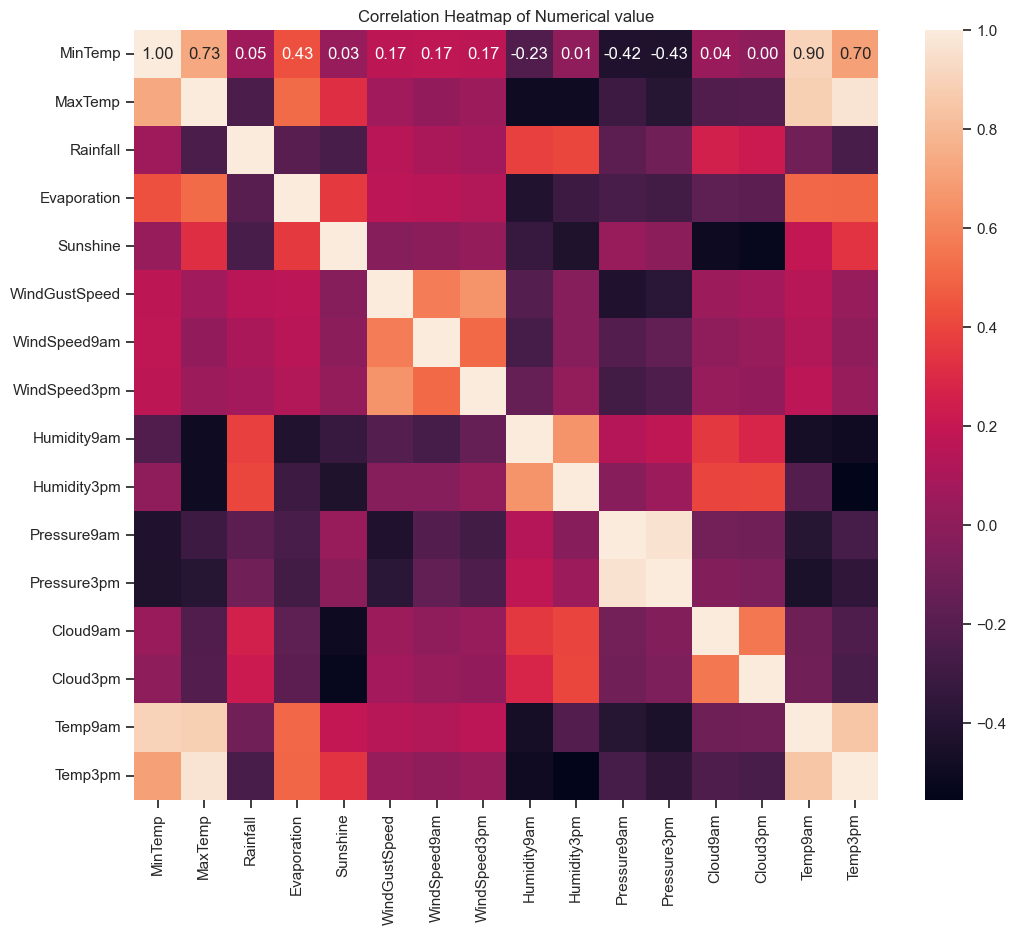

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df_fe[numerical].corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt='.2f')

# Set the title of the plot
plt.title('Correlation Heatmap of Numerical value')

# Show the plot
plt.show()

In [264]:
# sns.pairplot(df_fe[numerical], kind='scatter', diag_kind='hist', palette='Rainbow')
# plt.show()

the numerical have high correlation, so we can use PCA to reduce the dimensionality of the data.

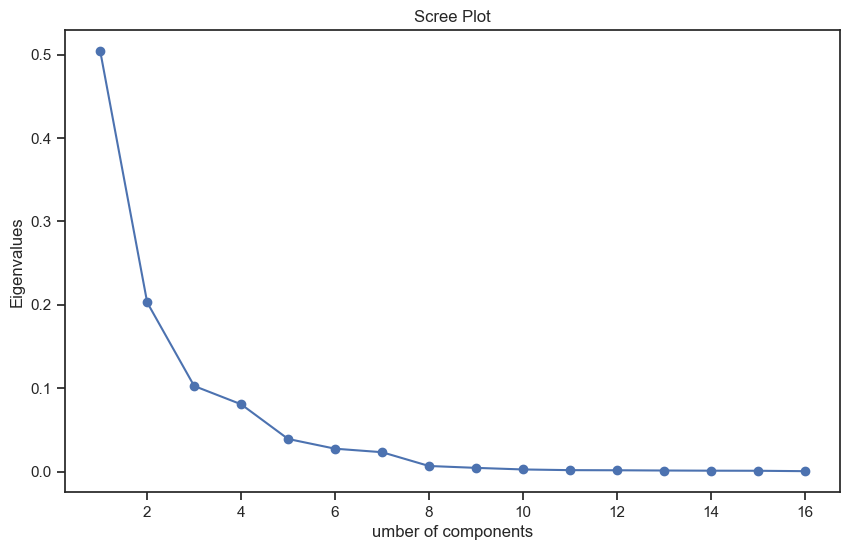

Text(0, 0.5, 'Cumulative explained variance')

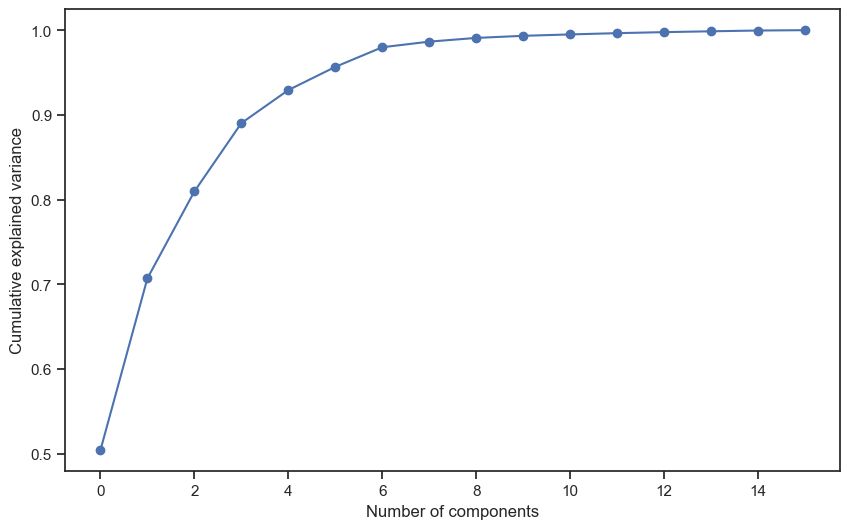

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns from df_fe
# numerical_cols = df_fe.select_dtypes(include=np.number).columns

# Standardize the numerical columns
# scaler = MinMaxScaler()
# df_fe_scaled = scaler.fit_transform(df_fe[numerical])
df_fe_scaled = df_fe[numerical]

# Perform PCA
pca = PCA()
pca.fit(df_fe_scaled)

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel("umber of components")
plt.ylabel("Eigenvalues")
plt.title('Scree Plot')
plt.show()

# Cumulative Explained Variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(len(cumulative_variance)), cumulative_variance, marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

In [266]:
# Find the best number of components based on cumulative variance
best_num_components = np.where(cumulative_variance > 0.95)[0][0] + 1
print(
    f"The best number of components based on cumulative variance is {best_num_components}", "with value ", cumulative_variance[best_num_components]
)

# Best based on Screen Plot
best_num_components_2 = np.where(pca.explained_variance_ratio_ < 0.03)[0][0] + 1
print(f"The best number of components based on Screen Plot is {best_num_components_2}", "with value ", pca.explained_variance_ratio_[best_num_components_2])

The best number of components based on cumulative variance is 6 with value  0.9798324008720023
The best number of components based on Screen Plot is 6 with value  0.023170861734318118


In [267]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the numerical columns from the DataFrame
# numerical_cols = df_fe.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical data
# scaler = StandardScaler()
# df_fe[numerical] = scaler.fit_transform(df_fe[numerical])

# Perform PCA
pca = PCA(n_components=6)  # Specify the number of components you want to extract
pca_result = pca.fit_transform(df_fe[numerical])
# print(len(pca_result[0]), pca_result[0])

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=pca_result, columns=[f"PCA{i}" for i in range(1, len(pca_result[0]) + 1)])

# Show the DataFrame
print(df_pca.head())

# merge with features_df_new
features_df_new = pd.concat([df_pca, features_df_new], axis=1)
print(features_df_new.head())

        PCA1       PCA2      PCA3       PCA4       PCA5      PCA6
0  21.030700   0.156539  9.783956 -20.096396   5.139910  9.261500
1  35.534522  -2.720325  3.091753  -0.706507  14.559686 -7.746181
2  38.128347   9.774379  0.612081   5.381494   7.948628  2.091786
3  39.675610 -24.172410 -1.427387   2.059688   5.957233  6.196465
4   8.081536  -5.222929 -4.500753 -27.028688   3.277826 -0.640899
        PCA1       PCA2      PCA3       PCA4       PCA5      PCA6  RainToday  \
0  21.030700   0.156539  9.783956 -20.096396   5.139910  9.261500          0   
1  35.534522  -2.720325  3.091753  -0.706507  14.559686 -7.746181          0   
2  38.128347   9.774379  0.612081   5.381494   7.948628  2.091786          0   
3  39.675610 -24.172410 -1.427387   2.059688   5.957233  6.196465          0   
4   8.081536  -5.222929 -4.500753 -27.028688   3.277826 -0.640899          0   

   WindDir9am_ESE  WindDir9am_NNW  
0               0               0  
1               0               1  
2              

In [268]:
print(features_df_new.head())

        PCA1       PCA2      PCA3       PCA4       PCA5      PCA6  RainToday  \
0  21.030700   0.156539  9.783956 -20.096396   5.139910  9.261500          0   
1  35.534522  -2.720325  3.091753  -0.706507  14.559686 -7.746181          0   
2  38.128347   9.774379  0.612081   5.381494   7.948628  2.091786          0   
3  39.675610 -24.172410 -1.427387   2.059688   5.957233  6.196465          0   
4   8.081536  -5.222929 -4.500753 -27.028688   3.277826 -0.640899          0   

   WindDir9am_ESE  WindDir9am_NNW  
0               0               0  
1               0               1  
2               0               0  
3               0               0  
4               0               0  


## Summary

after doing feature selection on categorical data, we get 3 features from 46.
while on numerical data, we get 6 features from 16. so after doing feature selection and extraction, we get 9 features from 62.